![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/multi_lingual_text_classification/colab/Training/multi_lingual/binary_text_classification/NLU_multi_lingual_training_sentiment_classifier_demo_apple_twitter.ipynb)



# Training a Sentiment Analysis Classifier with NLU 
## 2 class Apple Tweets Sentiment Classifier Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  : 

<br> 


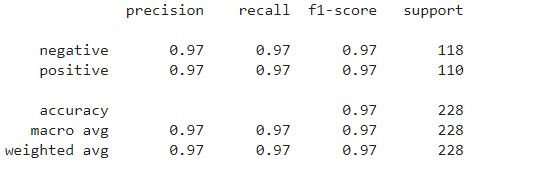

You can achieve these results or even better on this dataset with test data :

<br>

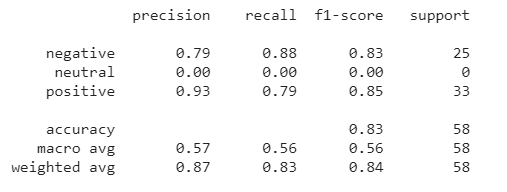

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu pyspark==2.4.7 > /dev/null  


import nlu

# 2. Download appple twitter  Sentiment dataset 
https://www.kaggle.com/seriousran/appletwittersentimenttexts

this dataset contains tweets made towards apple and today we are going to train our model to predict whether the tweet contains sentiment!


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/apple-twitter-sentiment-texts_multi_lingual.csv


--2021-02-25 14:09:06--  http://ckl-it.de/wp-content/uploads/2021/02/apple-twitter-sentiment-texts_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48565 (47K) [text/csv]
Saving to: ‘apple-twitter-sentiment-texts_multi_lingual.csv’

apple-twitter-senti 100%[===================>]  47.43K   159KB/s    in 0.3s    

2021-02-25 14:09:07 (159 KB/s) - ‘apple-twitter-sentiment-texts_multi_lingual.csv’ saved [48565/48565]



In [ ]:
import pandas as pd
train_path = '/content/apple-twitter-sentiment-texts_multi_lingual.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
columns=['text','y']
train_df = train_df[columns]
train_df = train_df[~train_df["y"].isin(["neuteral"])]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
19,Companies i admire : @3QDigital @vaynermedia @...,positive
239,waiting a week for a DUNS number is preventing...,negative
64,Thanks @Apple for the preview of your smartwat...,positive
108,@apple ur a disgrace,negative
285,Yeeaaayyy....awesome OS X Yosemite 10.10.1 roc...,positive
...,...,...
115,"@MhDaDon @Apple def gotta have it, I don't eve...",positive
185,Hey @apple are you even thinking about fixing ...,negative
57,Free s/o @apple for this nice iPad,positive
199,@OneRepublic @Apple #AppleAddict ! The show in...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  

trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
              precision    recall  f1-score   support

    negative       0.97      0.97      0.97       118
    positive       0.97      0.97      0.97       110

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



,sentiment_confidence,text,document,y,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,,,
19,0.999924,Companies i admire : @3QDigital @vaynermedia @...,Companies i admire : @3QDigital @vaynermedia @...,positive,"[0.003697995562106371, -0.033728744834661484, ...",positive
239,0.999974,waiting a week for a DUNS number is preventing...,waiting a week for a DUNS number is preventing...,negative,"[0.010905967094004154, 0.04764788970351219, 0....",negative
64,0.999988,Thanks @Apple for the preview of your smartwat...,Thanks @Apple for the preview of your smartwat...,positive,"[0.0010029257973656058, -0.0327875055372715, 0...",positive
108,0.999997,@apple ur a disgrace,@apple ur a disgrace,negative,"[-0.03643779084086418, -0.035430122166872025, ...",negative
285,0.999737,Yeeaaayyy....awesome OS X Yosemite 10.10.1 roc...,Yeeaaayyy....awesome OS X Yosemite 10.10.1 roc...,positive,"[-0.05403903126716614, -0.05731330066919327, -...",positive
...,...,...,...,...,...,...
115,0.999779,"@MhDaDon @Apple def gotta have it, I don't eve...","@MhDaDon @Apple def gotta have it, I don't eve...",positive,"[-0.055206991732120514, 0.02291109785437584, -...",negative
185,0.999997,Hey @apple are you even thinking about fixing ...,Hey @apple are you even thinking about fixing ...,negative,"[0.012110532261431217, -0.026404496282339096, ...",negative
57,0.999070,Free s/o @apple for this nice iPad,Free s/o @apple for this nice iPad,positive,"[-0.022697972133755684, -0.03592884913086891, ...",positive


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.79      0.88      0.83        25
     neutral       0.00      0.00      0.00         0
    positive       0.93      0.79      0.85        33

    accuracy                           0.83        58
   macro avg       0.57      0.56      0.56        58
weighted avg       0.87      0.83      0.84        58



#4.  Test Model  on 20  languages!

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/apple-twitter-sentiment-texts_multi_lingual.csv')
columns=['test_sentences','y']
train_df = train_df[columns]
train_df = train_df[~train_df["y"].isin(["neuteral"])]
train_df
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.94      0.94      0.94        47
     neutral       0.00      0.00      0.00         0
    positive       0.96      0.94      0.95        53

    accuracy                           0.94       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.95      0.94      0.94       100



,sentiment_confidence,text,document,y,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,,,
0,0.999736,"@Apple, du skal sortere dine telefoner.","@Apple, du skal sortere dine telefoner.",negative,"[-0.06157918646931648, -0.006414669565856457, ...",negative
1,0.509814,వావ్. యాల్ నీడా స్టెప్ అప్ @ యాపిల్ ఆర్టి y హే...,వావ్. యాల్ నీడా స్టెప్ అప్ @ యాపిల్ ఆర్టి y హే...,negative,"[-0.06188170239329338, -0.0713067352771759, -0...",neutral
2,0.947591,আমি আশ্চর্য হয়েছি যে গতকাল # এএপএল-তে ফ্ল্যাশ...,আমি আশ্চর্য হয়েছি যে গতকাল # এএপএল-তে ফ্ল্যাশ...,negative,"[-0.009524056687951088, -0.0228135883808136, -...",negative
3,0.804160,"Uvědomili jsme si, že @apple vyrábí obrovské t...","Uvědomili jsme si, že @apple vyrábí obrovské t...",negative,"[-0.05080720782279968, 0.035508088767528534, 0...",negative
4,0.999854,Apple Inc.'s administrerende direktør donerer ...,Apple Inc.'s administrerende direktør donerer ...,positive,"[-0.04884449020028114, -0.026541609317064285, ...",positive
...,...,...,...,...,...,...
95,0.994841,Təşəkkür edirəm @Apple İndi bir yerdə ünsiyyət...,Təşəkkür edirəm @Apple İndi bir yerdə ünsiyyət...,positive,"[-0.030292551964521408, -0.047181397676467896,...",positive
96,0.999003,. @ tim_cook Die woede wanneer hulle @ Apple G...,. @ tim_cook Die woede wanneer hulle @ Apple G...,negative,"[0.013441476970911026, -0.053970836102962494, ...",negative
97,0.871066,ছদ্মবেশের ধরণটি হ'ল এই @ অ্যাপল @ অটোকোরেক্ট @...,ছদ্মবেশের ধরণটি হ'ল এই @ অ্যাপল @ অটোকোরেক্ট @...,negative,"[-0.02878599800169468, -0.06805533915758133, 0...",negative


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:

fitted_pipe.predict("I hate the newest update!! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.955099,I hate the newest update!!,"[-0.03925565630197525, -0.0203737560659647, -0...",negative


In [ ]:
fitted_pipe.predict("I love the newest update!! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999108,I love the newest update!!,"[-0.03266981616616249, -0.03438195586204529, -...",positive


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# german for: 'I love the newest update!!'
fitted_pipe.predict("Ich liebe das neueste Update !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999108,Ich liebe das neueste Update !!,"[-0.03806369751691818, -0.03677768632769585, -...",positive


In [ ]:
# german for: 'Apple is the worst company ever  , I hate it !'
fitted_pipe.predict("Apple ist das schlechteste Unternehmen aller Zeiten, ich hasse es! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999567,Apple ist das schlechteste Unternehmen aller Z...,"[-0.06440500915050507, 0.011019396595656872, -...",negative


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: 'I hate the newest update!!'
fitted_pipe.predict("我讨厌最新的更新！ ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.956440,我讨厌最新的更新！,"[-0.035996973514556885, -0.038595858961343765,...",negative


In [ ]:
# Chinese for: 'I love the newest update!!'
fitted_pipe.predict("我喜欢最新的更新！ ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999690,我喜欢最新的更新！,"[-0.03270617872476578, -0.03804901987314224, -...",positive


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
		
#  Afrikaans for: 'I hate the newest update!!'
fitted_pipe.predict("Ek haat die nuutste opdatering !! ")


,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.973612,Ek haat die nuutste opdatering !!,"[-0.04320189356803894, -0.023186640813946724, ...",negative


In [ ]:
#  Afrikaans for: 'I love the newest update!!'
fitted_pipe.predict("Ek is lief vir die nuutste opdatering !! ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999405,Ek is lief vir die nuutste opdatering !!,"[-0.031754832714796066, -0.03518301621079445, ...",positive


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:

# Vietnamese for: 'I love the newest update!!'
fitted_pipe.predict("Tôi yêu bản cập nhật mới nhất !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.760163,Tôi yêu bản cập nhật mới nhất !!,"[-0.007813846692442894, -0.0691518485546112, -...",positive


In [ ]:

# Vietnamese for: 'Apple is the worst company ever  , I hate it !'
fitted_pipe.predict("Apple là công ty tồi tệ nhất từ ​​trước đến nay, tôi ghét nó!")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999311,Apple là công ty tồi tệ nhất từ ​​trước đến na...,"[-0.06147119030356407, 0.037075284868478775, 0...",negative


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:
# Japanese for: 'I hate the newest update!!'
fitted_pipe.predict("私は最新のアップデートが嫌いです！ ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.969206,私は最新のアップデートが嫌いです！,"[-0.030076518654823303, -0.002390796784311533,...",negative


In [ ]:
		
# Japanese for: 'I love the newest update!!'
fitted_pipe.predict("私は最新のアップデートが大好きです！ ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999745,私は最新のアップデートが大好きです！,"[-0.015637995675206184, -0.022478939965367317,...",positive


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Zulu for: 'I love the newest update!!'
fitted_pipe.predict("Ngiyasithanda isibuyekezo esisha !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.998697,Ngiyasithanda isibuyekezo esisha !!,"[-0.018757890909910202, -0.031556978821754456,...",positive


In [ ]:
#  Zulu for: Apple is the worst company ever  , I hate it !'
fitted_pipe.predict("I-Apple iyinkampani embi kunazo zonke ezake, ngiyayizonda!")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.997667,"I-Apple iyinkampani embi kunazo zonke ezake, n...","[-0.060404010117053986, 0.02596486359834671, 0...",negative


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
#  Turkish for: 'I hate the newest update!!'
fitted_pipe.predict("En yeni güncellemekten nefret ediyorum !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.928913,En yeni güncellemekten nefret ediyorum !!,"[-0.006802689284086227, -0.03453183174133301, ...",negative


In [ ]:
#  Turkish for: 'I love the newest update!!'
fitted_pipe.predict("En yeni güncellemeyi seviyorum !! ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999000,En yeni güncellemeyi seviyorum !!,"[-0.013165177777409554, -0.04192955046892166, ...",positive


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for: 'I hate the newest update!!'
fitted_pipe.predict("אני שונא את העדכון החדש ביותר! ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.866008,אני שונא את העדכון החדש ביותר!,"[-0.02679138444364071, -0.02492380701005459, 0...",negative


In [ ]:
# Hebrew for: 'I love the newest update!!'
fitted_pipe.predict("אני אוהב את העדכון החדש ביותר !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999521,אני אוהב את העדכון החדש ביותר !!,"[-0.025626324117183685, -0.03748653084039688, ...",positive


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for: 'I love the newest update!!'
fitted_pipe.predict("నేను సరికొత్త నవీకరణను ప్రేమిస్తున్నాను !! ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999573,నేను సరికొత్త నవీకరణను ప్రేమిస్తున్నాను !!,"[-0.035736508667469025, -0.04187411814928055, ...",positive


In [ ]:
# Telugu for: 'Apple is the worst company ever  , I hate it !'
fitted_pipe.predict(" ఆపిల్ ఎప్పుడూ చెత్త సంస్థ, నేను దానిని ద్వేషిస్తున్నాను!  ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.996478,"ఆపిల్ ఎప్పుడూ చెత్త సంస్థ, నేను దానిని ద్వేషిస...","[-0.06062706932425499, 0.01440807431936264, -0...",negative


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: 'I hate the newest update!!'
fitted_pipe.predict("Я ненавижу новейшее обновление !! ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.965200,Я ненавижу новейшее обновление !!,"[-0.05251258239150047, -0.02137315832078457, -...",negative


In [ ]:


#  Russian for: 'I love the newest update!!'
fitted_pipe.predict("Я люблю новейшее обновление !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999347,Я люблю новейшее обновление !!,"[-0.04557504877448082, -0.0393301397562027, -0...",positive


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
# Urdu for: 'I hate the newest update!!'
fitted_pipe.predict("مجھے تازہ ترین اپ ڈیٹ سے نفرت ہے !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.983793,مجھے تازہ ترین اپ ڈیٹ سے نفرت ہے !!,"[-0.04204098507761955, -0.040164727717638016, ...",negative


In [ ]:
# Urdu for: 'I love the newest update!!'
fitted_pipe.predict("مجھے تازہ ترین تازہ کاری پسند ہے !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.997037,مجھے تازہ ترین تازہ کاری پسند ہے !!,"[-0.020344946533441544, -0.050028394907712936,...",positive


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# hindi for: 'I hate the newest update!!'
fitted_pipe.predict("मुझे नवीनतम अपडेट से नफरत है !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.974632,मुझे नवीनतम अपडेट से नफरत है !!,"[-0.045306481420993805, -0.03867834806442261, ...",negative


In [ ]:
# hindi for: 'I love the newest update!!'
fitted_pipe.predict("मैं नवीनतम अद्यतन प्यार करता हूँ !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.998251,मैं नवीनतम अद्यतन प्यार करता हूँ !!,"[-0.03802282363176346, -0.04779476672410965, -...",positive


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: 'I hate the newest update!!'
fitted_pipe.predict("Мин яңа яңартуны нәфрәт итәм !! ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.633860,Мин яңа яңартуны нәфрәт итәм !!,"[-0.03812285140156746, -0.03321801871061325, -...",negative


In [ ]:

# Tartar for: 'I love the newest update!!'
fitted_pipe.predict("Мин иң яңа яңартуны яратам !! ")
	

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999220,Мин иң яңа яңартуны яратам !!,"[-0.022450298070907593, -0.04027741029858589, ...",positive


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for: 'I hate the newest update!!'
fitted_pipe.predict("Je déteste la nouvelle mise à jour !! ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.621008,Je déteste la nouvelle mise à jour !!,"[-0.0480484738945961, -0.019815556704998016, -...",negative


In [ ]:
# French for: 'I love the newest update!!'
fitted_pipe.predict("J'adore la dernière mise à jour !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.998835,J'adore la dernière mise à jour !!,"[-0.03898211941123009, -0.04296712577342987, -...",positive


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
# Thai for: 'I hate the newest update!!'
fitted_pipe.predict("ฉันเกลียดการอัปเดตใหม่ล่าสุด !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.989458,ฉันเกลียดการอัปเดตใหม่ล่าสุด !!,"[-0.05030808597803116, -0.03610168397426605, -...",negative


In [ ]:
# Thai for: 'I love the newest update!!'
fitted_pipe.predict("โดนใจอัพเดทใหม่ล่าสุด !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.996418,โดนใจอัพเดทใหม่ล่าสุด !!,"[-0.046895794570446014, -0.047694914042949677,...",positive


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for: 'I hate the newest update!!'
fitted_pipe.predict("ខ្ញុំស្អប់ការអាប់ដេតថ្មីបំផុត !! ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.945463,ខ្ញុំស្អប់ការអាប់ដេតថ្មីបំផុត !!,"[-0.04094553366303444, -0.04082178324460983, -...",negative


In [ ]:
# Khmer for: 'I love the newest update!!'
fitted_pipe.predict("ខ្ញុំចូលចិត្តការអាប់ដេតថ្មីបំផុត !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999485,ខ្ញុំចូលចិត្តការអាប់ដេតថ្មីបំផុត !!,"[-0.0357854850590229, -0.035129521042108536, -...",positive


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:

# Yiddish for: 'I love the newest update!!'
fitted_pipe.predict("איך ליבע דער נואַסט דערהייַנטיקן !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.999170,איך ליבע דער נואַסט דערהייַנטיקן !!,"[-0.030090758576989174, -0.060998495668172836,...",positive


In [ ]:

# Yiddish for: 'Apple is the worst company ever  , I hate it !'
fitted_pipe.predict("עפּל איז די ערגסט פירמע טאָמיד, איך האַס עס!")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.972911,"עפּל איז די ערגסט פירמע טאָמיד, איך האַס עס!","[-0.04640829935669899, 0.007680136244744062, 0...",negative


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
		
# Kygrgyz for: 'I hate the newest update!!'
fitted_pipe.predict("Мен жаңы жаңыртууну жек көрөм !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.945150,Мен жаңы жаңыртууну жек көрөм !!,"[-0.040810152888298035, -0.03718705102801323, ...",negative


In [ ]:
		
# Kygrgyz for: 'I love the newest update!!'
fitted_pipe.predict("Мен жаңы жаңыртууну жакшы көрөм !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.998985,Мен жаңы жаңыртууну жакшы көрөм !!,"[-0.029403185471892357, -0.0417410284280777, -...",positive


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
		
# Tamil for: 'I hate the newest update!!'
fitted_pipe.predict("நான் புதிய புதுப்பிப்பை வெறுக்கிறேன் !! ")
		

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.678744,நான் புதிய புதுப்பிப்பை வெறுக்கிறேன் !!,"[-0.04580854997038841, -0.03527894988656044, -...",negative


In [ ]:

# Tamil for: 'I love the newest update!!'
fitted_pipe.predict("நான் புதிய புதுப்பிப்பை விரும்புகிறேன் !! ")

,sentiment_confidence,document,xx_embed_sentence_labse_embeddings,sentiment
origin_index,,,,
0,0.995342,நான் புதிய புதுப்பிப்பை விரும்புகிறேன் !!,"[-0.03591679036617279, -0.05217977613210678, -...",positive


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('I hate the newest update')
preds

,document,sentiment,sentiment_confidence,xx_embed_sentence_labse_embeddings
origin_index,,,,
0,I hate the newest update,negative,0.998501,"[-0.04603004455566406, 0.032716553658246994, 0..."


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')        | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['regex_tokenizer'] has settable params:
pipe['regex_tokenizer'].setCaseSensitiveExceptions(True)   | Info: Whether to care for case sensitiveness in exceptions | Currently set to : True
pipe['regex_tokenizer'].setTargetPattern('\S+')            | Info: pattern to grab from text as token candidates. Defaults \S+ | Currently set to : \S+
pipe['regex_tokenizer'].setMaxLength(99999)                | Info: Set the maximum allowed length for each token | Currently set to : 99999
pipe['regex_tokenizer'].setMinLength(0)                    | Info: Set the minimum allowed length for each token | Currently set to : 0
>>> pipe['sentence_detector'] 